# Image Dataset preparation

## 1- Extract images from synchrtron raw files *.nxs file

## 1-0 Extract images from synchrtron raw files *.nxs file (optionnal)

In [1]:
from extract import extract_nxs_folder
shape = "triangle"
#folder_path = "../data/mini_dataset/triangle"
folder_path = "D:/data_saxs_LPS/reduced_dataset/"+shape 
save_file = f"{shape}.npy"
data_eiger, data_pos, data_basler = extract_nxs_folder(folder_path, save_file)

10/691 files processed
20/691 files processed
30/691 files processed
40/691 files processed
50/691 files processed
60/691 files processed
70/691 files processed
80/691 files processed
90/691 files processed
100/691 files processed
110/691 files processed
120/691 files processed
130/691 files processed
140/691 files processed
150/691 files processed
160/691 files processed
170/691 files processed
180/691 files processed
190/691 files processed
200/691 files processed
210/691 files processed
220/691 files processed
230/691 files processed
240/691 files processed
250/691 files processed
260/691 files processed
270/691 files processed
280/691 files processed
290/691 files processed
300/691 files processed
310/691 files processed
320/691 files processed
330/691 files processed
340/691 files processed
350/691 files processed
360/691 files processed
370/691 files processed
380/691 files processed
390/691 files processed
400/691 files processed
410/691 files processed
420/691 files processed
4

In [2]:
print("Eiger :", data_eiger.shape)

Eiger : (691, 3, 1083, 1035)


## 1 Import images from numpy files

### 1-1 Load numpy file

In [3]:
import numpy as np
#C:\Users\cayez\Documents\DONNEES_SIMON\Enseignements\NINO_workshop\Notebooks\part2_synchrotron\data\nxs
#data_eiger = np.load(save_file)
print(data_eiger.shape)

(691, 3, 1083, 1035)


### 1-2 Select first channel

The dimensions can be read as: (number of images, number of channels, width, height). In this sychrotron run, we took 3 pictures for each position. Let's keep only the first image to avoid repetitions in the dataset.

In [4]:
import os

first_channels = data_eiger[:, 0, :, :] 

save_path = os.path.join(folder_path, "first_channel.npy")
np.save(save_path, first_channels)

print(f"First channel saved as {save_path}")


# # Save the first channel array in the current working directory
# np.save("first_channel.npy", first_channels)
# print(f"First channel data saved ")

First channel saved as D:/data_saxs_LPS/reduced_dataset/triangle\first_channel.npy


## 2 Explore image format

### 2-1 Numpy array shape

In [5]:
print("Original Shape:", data_eiger.shape)
print("First channel only Shape:", first_channels.shape)

Original Shape: (691, 3, 1083, 1035)
First channel only Shape: (691, 1083, 1035)


### 2-1 Plot images

Plot first image

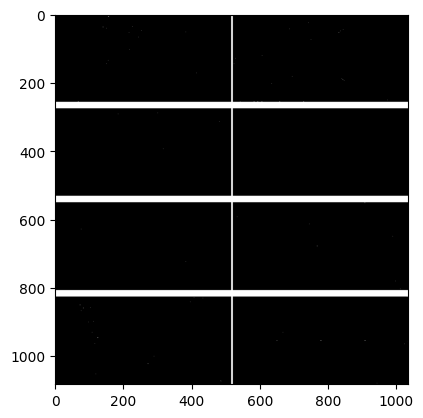

In [6]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.imshow(first_channels[0, :, :],cmap='gray')

Plot first 3 images: 

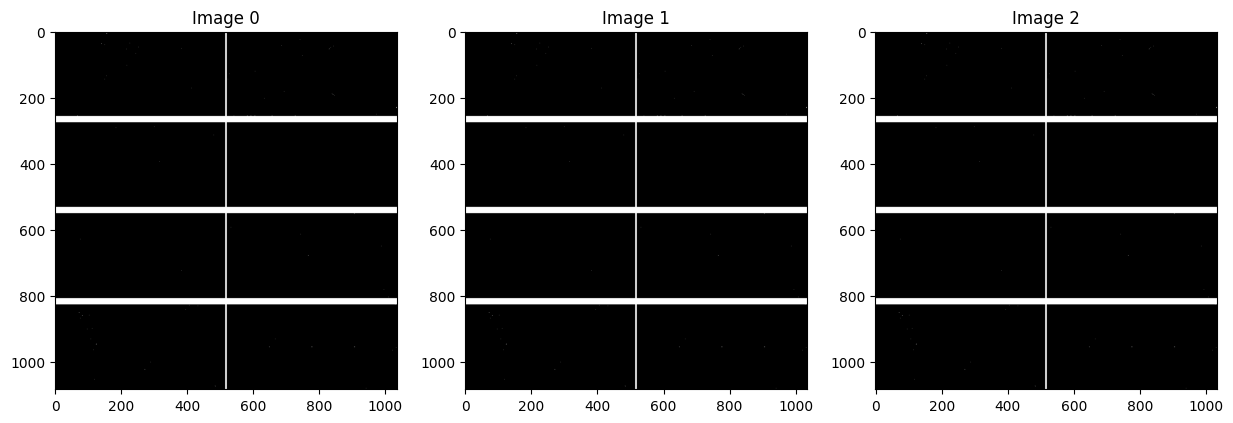

In [7]:

fig, axes = plt.subplots(1, 3, figsize=(15,5))
for i in range(3):
    axes[i].imshow(first_channels[i, :, :],cmap='gray')
    axes[i].set_title(f"Image {i}")

No signal visible on images! A usual process on SAXS image is to plot log of images

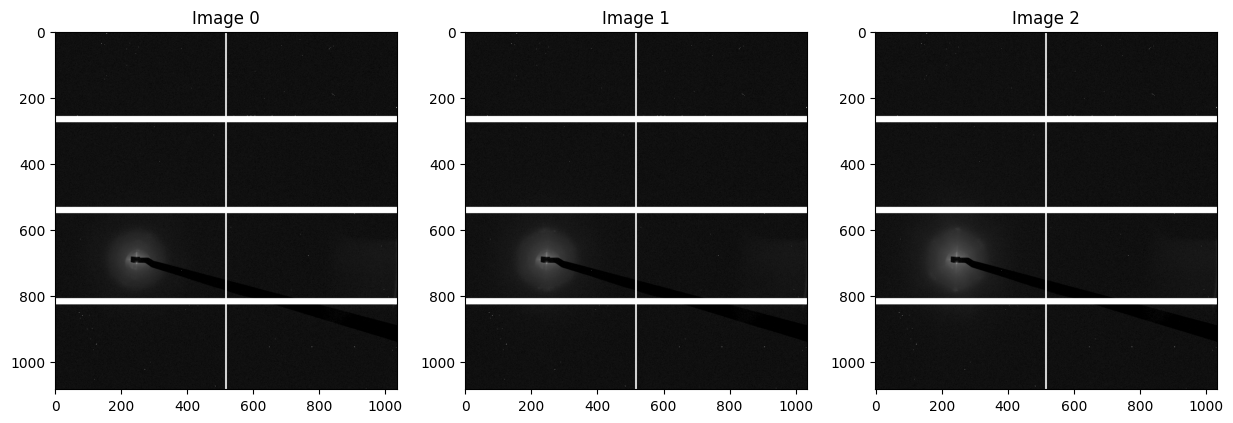

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
for i in range(3):
    axes[i].imshow(np.log1p(first_channels[i, :, :]),cmap='gray')
    axes[i].set_title(f"Image {i}")

### 2-3 Log scale

So far, we just displayed the image in log, but the data were not changed.   
Apply the log to the numpy array.

In [9]:
### Check pixel values:
print(f"Minimal pixel value before log:    {np.min(first_channels[0,:,:])}")
print(f"Maximal pixel value before log:    {np.max(first_channels[0,:,:])}")
print(f"Mean pixel value before log:       {np.mean(first_channels[0,:,:])}")
# Appliquer log1p à toutes les images
data_log = np.log1p(first_channels)
print(f"Minimal pixel value after log:    {np.min(data_log[0,:,:])}")
print(f"Maximal pixel value after log:    {np.max(data_log[0,:,:])}")
print(f"Mean pixel value after log:       {np.mean(data_log[0,:,:])}")

Minimal pixel value before log:    0
Maximal pixel value before log:    4294967295
Mean pixel value before log:       246102192.59567136
Minimal pixel value after log:    0.0
Maximal pixel value after log:    22.18070977791825
Mean pixel value after log:       2.66199991354709


Do function to print the minimal, maximal, maen and median values of pixel for a selected index in the data.
This function will:
- Have the name: `print_image_stats`
- Take as argument: 
    - Images : a numpy array with the format (nbr_image,width, height)  
    - Index : the index of the image in the dataset 

- Return:
    - Nothing


In [10]:
from vizualisation import print_image_stats

print_image_stats(first_channels, image_index=0)
print('-----------------------------------------------------')
print_image_stats(data_log, image_index=0)

Statistic            Value
--------------------------
Min                 0.0000
Max             4294967295.0000
Mean            246102192.5957
Median              4.0000
-----------------------------------------------------
Statistic            Value
--------------------------
Min                 0.0000
Max                22.1807
Mean                2.6620
Median              1.6094


### 2-4 Check all images with a video

An option to have a fast overview of the images is to convert the dataset in a film. Use Open CV to do a function.   

This function will:
- Have the name: `create_video_from_images`
- Take as argument: 
    - Images : a numpy array with the format (nbr_image,width, height)  
    - Output : tht save path 

- Return:
    - Nothing

Use this function to make a video from data_log

In [11]:
from vizualisation import create_video_from_images
create_video_from_images(data_log, 'mini_dataset.mp4', fps=6)

Creating video with 691 frames at 6 FPS...
Processed frame 1/691
Processed frame 5/691
Processed frame 10/691
Processed frame 15/691
Processed frame 20/691
Processed frame 25/691
Processed frame 30/691
Processed frame 35/691
Processed frame 40/691
Processed frame 45/691
Processed frame 50/691
Processed frame 55/691
Processed frame 60/691
Processed frame 65/691
Processed frame 70/691
Processed frame 75/691
Processed frame 80/691
Processed frame 85/691
Processed frame 90/691
Processed frame 95/691
Processed frame 100/691
Processed frame 105/691
Processed frame 110/691
Processed frame 115/691
Processed frame 120/691
Processed frame 125/691
Processed frame 130/691
Processed frame 135/691
Processed frame 140/691
Processed frame 145/691
Processed frame 150/691
Processed frame 155/691
Processed frame 160/691
Processed frame 165/691
Processed frame 170/691
Processed frame 175/691
Processed frame 180/691
Processed frame 185/691
Processed frame 190/691
Processed frame 195/691
Processed frame 200

## 3 Crop images

### 3-1 Select crop coordinates

On the video, we can see the signal is always in the same region, we will chose to keep only the frame containing the signal.

- Plot image number zero and crop it to keep only the part with signal.

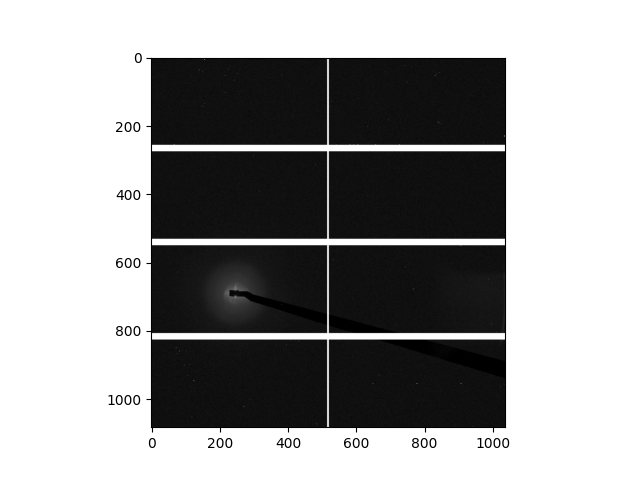

In [12]:
%matplotlib widget
fig, ax = plt.subplots()
ax.imshow(data_log[0,:, :],cmap='gray')

Visually select x and y ranges

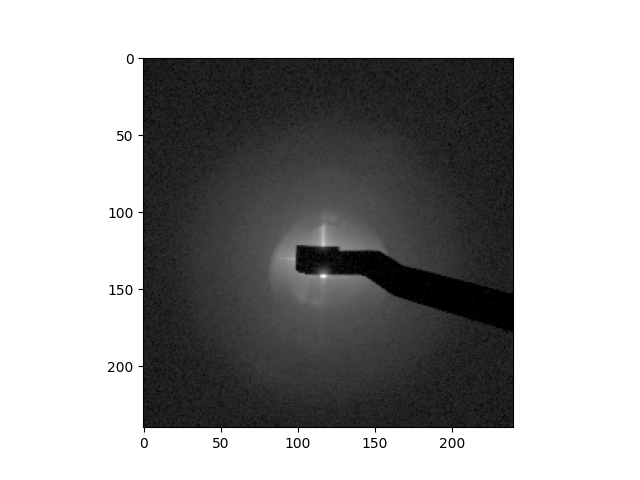

In [13]:
fig, ax = plt.subplots()
#ax.imshow(data_log[0,560:805, 100:400],cmap='gray')
ax.imshow(data_log[0,560:800, 130:370],cmap='gray')

In [14]:
#data_crop = data_log[:,555:805, 55:425]
data_crop = data_log[:,560:800, 130:370]
print("Before Crop :", data_log.shape)
print("After Crop :", data_crop.shape)

Before Crop : (691, 1083, 1035)
After Crop : (691, 240, 240)


## 4- Pixels Values

In [15]:
from vizualisation import print_image_stats
print_image_stats(data_crop, image_index=0)

Statistic            Value
--------------------------
Min                 0.0000
Max                14.9347
Mean                2.7274
Median              2.3979


Plot the histogram of first image

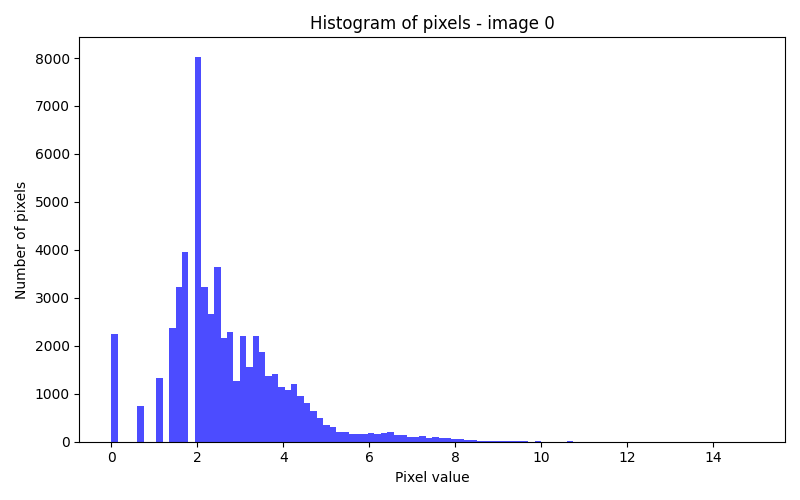

In [16]:
from vizualisation import plot_image_histogram
plot_image_histogram(data_crop) 

We have few strongs values.  
Try to locate them by plotting red markers on the pixels >threshold for first image

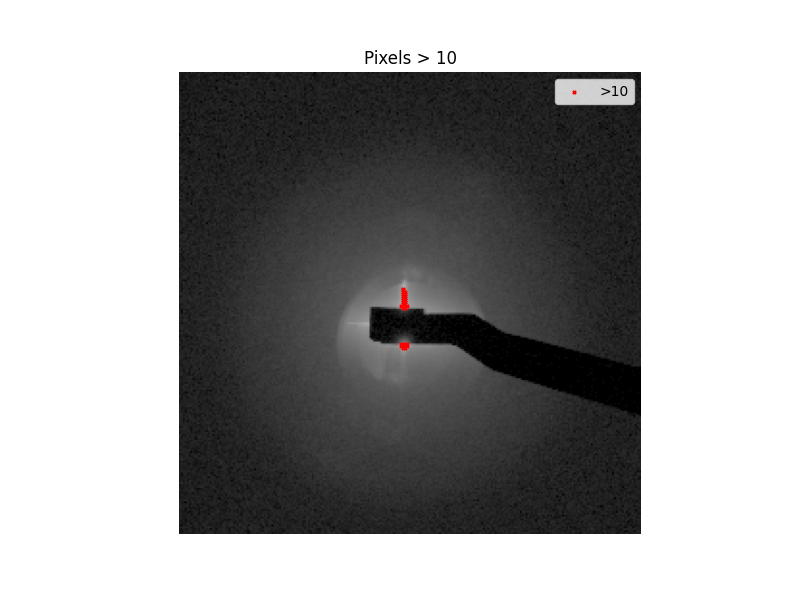

Number of pixels > 10: 32


In [17]:
from vizualisation import show_image_with_pixels_over_threshold
threshold = 10
show_image_with_pixels_over_threshold(data_crop[0,:,:], threshold=threshold)


We can then localize strong values pixels. But 1 picture is not so representative.  
Display 6 images with as argument 6 randoms index.

In [18]:
import random
# Randomly select 6 indices from the first dimension
n_images = data_eiger.shape[0]
random_indices = random.sample(range(n_images), 6)
print(random_indices)

[99, 501, 651, 645, 453, 84]


Check on 6 random images with a plot function

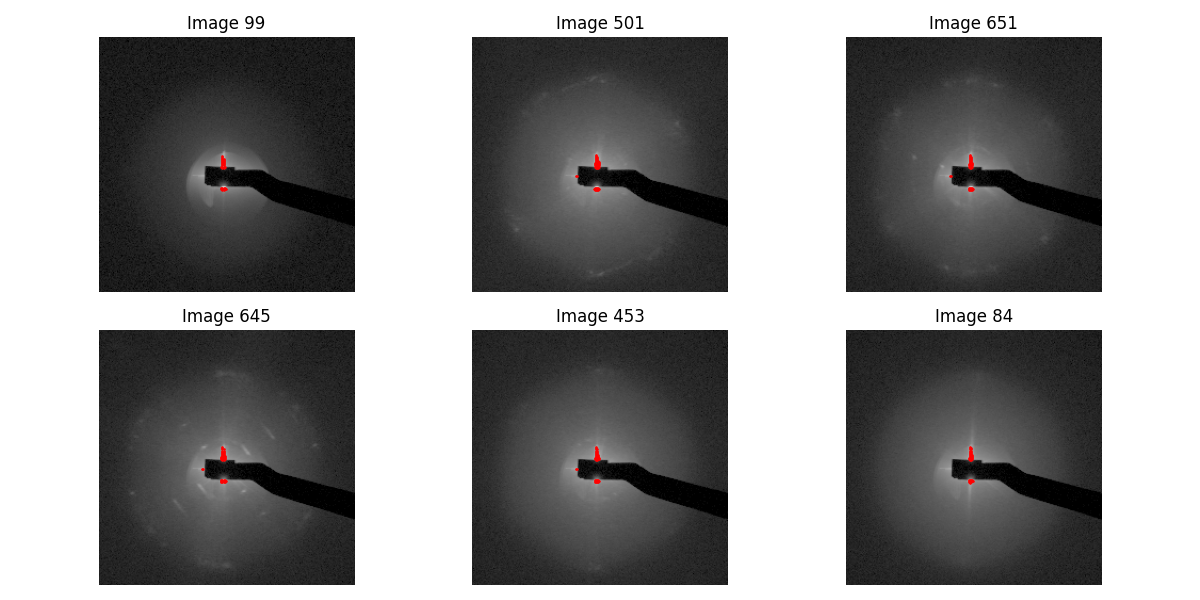

In [19]:
from vizualisation import plot_6images
plot_6images(data_crop, random_indices, threshold=threshold, show_threshold=True)

We want an histogram with a good repartition on all the values. 

In [20]:
from vizualisation import print_image_stats
print_image_stats(data_crop, image_index=0)

Statistic            Value
--------------------------
Min                 0.0000
Max                14.9347
Mean                2.7274
Median              2.3979


In [21]:
data_clip = np.clip(data_crop, min = None, max = threshold)
print(f"Minimal pixel value after clip:    {np.min(data_clip[0,:,:])}")
print(f"Maximal pixel value after clip:    {np.max(data_clip[0,:,:])}")
print(f"Mean pixel value after clip:       {np.mean(data_clip[0,:,:])}")
print(f"Median pixel value after clip:       {np.median(data_clip[0,:,:])}")

Minimal pixel value after clip:    0.0
Maximal pixel value after clip:    10.0
Mean pixel value after clip:       2.726581257656055
Median pixel value after clip:       2.3978952727983707


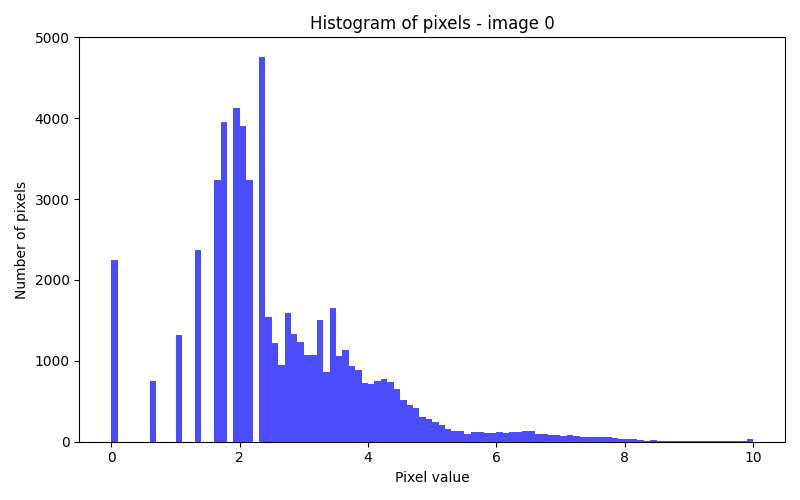

In [22]:
plot_image_histogram(data_clip) 

Our histogram in now well balanced. Next step is to normalize, to have all values between 0 and 1. Just divide all the pixels values by the maximum value.

In [23]:
data_norm = data_clip / threshold
for i in random_indices:
    print_image_stats(data_norm, image_index=0)

Statistic            Value
--------------------------
Min                 0.0000
Max                 1.0000
Mean                0.2727
Median              0.2398
Statistic            Value
--------------------------
Min                 0.0000
Max                 1.0000
Mean                0.2727
Median              0.2398
Statistic            Value
--------------------------
Min                 0.0000
Max                 1.0000
Mean                0.2727
Median              0.2398
Statistic            Value
--------------------------
Min                 0.0000
Max                 1.0000
Mean                0.2727
Median              0.2398
Statistic            Value
--------------------------
Min                 0.0000
Max                 1.0000
Mean                0.2727
Median              0.2398
Statistic            Value
--------------------------
Min                 0.0000
Max                 1.0000
Mean                0.2727
Median              0.2398


## 5 Resize image

For CNN resolution is not a key point, smaller images allow to hadle a bigger quantity of image for an equivalent memory space.  
Use skimage.transform to resize the data

In [24]:
from skimage.transform import resize

# data : (N, H, W)
new_h, new_w = 128, 128
data_resized = resize(
    data_norm, 
    (data_norm.shape[0], new_h, new_w),  # même nombre d'images
    order=1,                       # bilinear interpolation
    preserve_range=True,            # garde les valeurs originales (pas normalisé)
    anti_aliasing=True
)
print(data_resized.shape)

(691, 128, 128)


In [25]:
save_path = os.path.join(folder_path, shape+"_data_preprocess.npy")
np.save(save_path, data_resized)